In [3]:
# Practical Exercise: Classification and Regression with Pima Indians Diabetes Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score


In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree  age  diabetes  
0              0.627   50         1  
1              0.351   31         0  
2              0.672   32         1  
3              0.167   21         0  
4              2.288   33         1  
Best params (classification): {'max_depth': 6, 'n_estimators': 50}
Alpha=0.1, RMSE=29.48649960982089
Alpha=1.0, RMSE=29.482902960920306
Alpha=10.0, RMSE=29.453007510029497
Classification cross-val accuracy: 0.70 ± 0.06
Accuracy with small training set: 0.6428571428571429
Confusion Matrix:
 [[78 21]
 [22 33]]
Accuracy: 0.72077

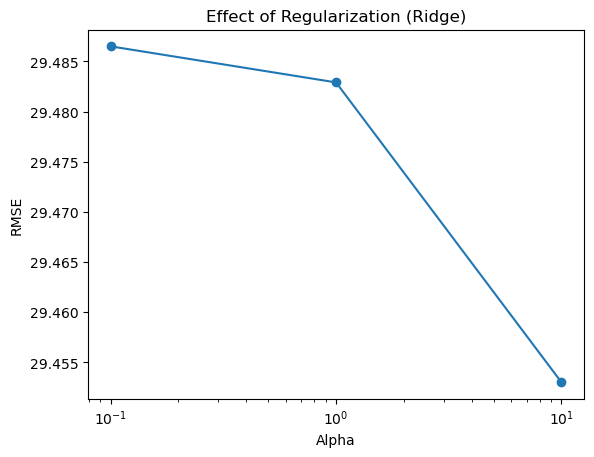

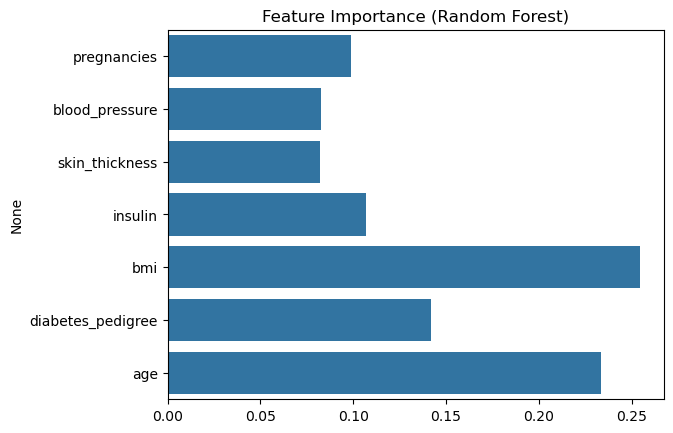

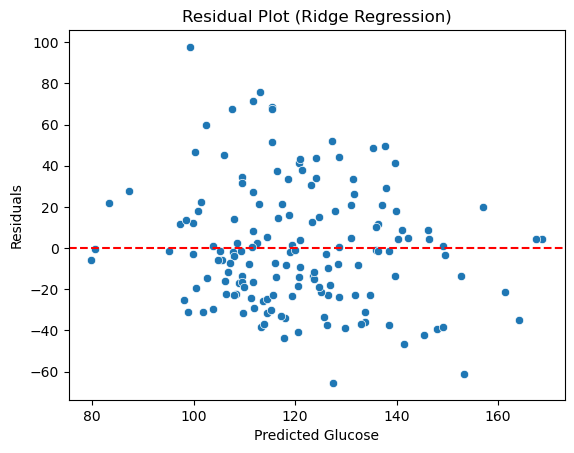

In [5]:

# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)
df.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'diabetes']
print(df.head())

# Preprocessing
X = df.drop(['diabetes', 'glucose'], axis=1)  # Features
y_classification = df['diabetes']             # For classification
y_regression = df['glucose']                  # For regression

# Train-Test Split
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Classification: Random Forest + Grid Search
param_grid = {'n_estimators': [50, 100], 'max_depth': [4, 6, 8]}
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_class_train)
print("Best params (classification):", clf.best_params_)

# Regression: Ridge Regression
alphas = [0.1, 1.0, 10.0]
best_rmse = float('inf')
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_reg_train)
    preds = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_reg_test, preds))
    print(f"Alpha={alpha}, RMSE={rmse}")

# Cross-validation (impact of size)
scores = cross_val_score(clf.best_estimator_, X, y_classification, cv=10)
print(f"Classification cross-val accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

# Effect of small training set
small_X = X_train.sample(frac=0.2, random_state=1)
small_y = y_class_train.loc[small_X.index]
clf_small = RandomForestClassifier().fit(small_X, small_y)
print("Accuracy with small training set:", accuracy_score(y_class_test, clf_small.predict(X_test)))

# Evaluation
# Classification
y_pred_class = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_pred_class))
print("Accuracy:", accuracy_score(y_class_test, y_pred_class))

# Regression
def ridge_eval(alpha=1.0):
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_reg_train)
    y_pred = reg.predict(X_test)
    print("Regression RMSE:", np.sqrt(mean_squared_error(y_reg_test, y_pred)))
    print("R² Score:", r2_score(y_reg_test, y_pred))
    return y_pred

y_pred_reg = ridge_eval(alpha=1.0)

# Regularization Plot
rmses = []
for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_reg_train)
    pred = reg.predict(X_test)
    rmses.append(np.sqrt(mean_squared_error(y_reg_test, pred)))

plt.plot(alphas, rmses, marker='o')
plt.title("Effect of Regularization (Ridge)")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.xscale('log')
plt.show()

# Feature Importance
importances = clf.best_estimator_.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Residual Plot
residuals = y_reg_test - y_pred_reg
sns.scatterplot(x=y_pred_reg, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Ridge Regression)")
plt.xlabel("Predicted Glucose")
plt.ylabel("Residuals")
plt.show()
